# Exploratory Data Analysis of Valorant Esports Data

# Steps
* Reading Data
* Basic Investigation
* Visualizations

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from warnings import simplefilter
simplefilter("ignore")

# Reading Data

In [2]:
# Reading the files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/valorant-esports-top-earnings/Players.csv
/kaggle/input/valorant-esports-top-earnings/Teams.csv


In [3]:
# Converting files to dataframes
players = pd.read_csv('/kaggle/input/valorant-esports-top-earnings/Players.csv')
teams = pd.read_csv('/kaggle/input/valorant-esports-top-earnings/Teams.csv')

# Basic Investigation

In [4]:
# top 5 rows of players data
print('Top 5 rows of Players data\n')
players.head()

Top 5 rows of Players data



,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [5]:
# top 5 rows of teams data
print('Top 5 rows of Teams data\n')
teams.head()

Top 5 rows of Teams data



,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


In [6]:
# Players and teams data shapes
print(f'Players data shape: {players.shape}')
print(f'Teams data shape: {teams.shape}')

Players data shape: (500, 7)
Teams data shape: (402, 7)


In [7]:
# Players data types
players.dtypes

Rank         int64
Player      object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings    object
dtype: object

In [8]:
# Teams data types
teams.dtypes

Rank         int64
Team        object
Gold         int64
Silver       int64
Bronze       int64
S Tier       int64
Earnings    object
dtype: object

'$' Symbol to be removed from Earnings feature for further processing

In [9]:
# Checking for data count in players data
players.count()

Rank        500
Player      500
Gold        500
Silver      500
Bronze      500
S Tier      500
Earnings    500
dtype: int64

In [10]:
# checking for data count in teams data
teams.count()

Rank        402
Team        402
Gold        402
Silver      402
Bronze      402
S Tier      402
Earnings    402
dtype: int64

No missing values in both datasets

In [11]:
#checking for duplicate values in players data
players.duplicated().sum()

0

In [12]:
# checking for duplicate values in teams data
teams.duplicated().sum()

0

No duplicate values in both datasets

Before doing some data anlysis, lets remove $ symbol from 'Earnings' feature

In [13]:
# Replacing $ with blank
players['Earnings'] = players['Earnings'].str.replace('$','').str.replace(',','')
teams['Earnings'] = teams['Earnings'].str.replace('$','').str.replace(',','')

In [14]:
# Converting Earnings feature to numeric
players['Earnings'] = pd.to_numeric(players['Earnings'])
teams['Earnings'] = pd.to_numeric(teams['Earnings'])

if players['Earnings'].dtype in ['int64','float64']:
    print('Conversion done')
else:
    print('Please try once again')

Conversion done


In [15]:
# basic stats of players data
players.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,500.0,NaN,NaN,NaN,250.424,144.452002,1.0,125.75,250.5,375.25,500.0
Player,500,499,k1Ng,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,500.0,NaN,NaN,NaN,6.912,4.755364,0.0,3.0,6.0,9.0,26.0
Silver,500.0,NaN,NaN,NaN,4.054,2.576113,0.0,2.0,4.0,6.0,13.0
Bronze,500.0,NaN,NaN,NaN,1.666,1.461066,0.0,1.0,1.0,2.0,8.0
S Tier,500.0,NaN,NaN,NaN,0.03,0.170758,0.0,0.0,0.0,0.0,1.0
Earnings,500.0,NaN,NaN,NaN,17646.662,19277.866853,5530.0,7272.75,10723.0,18471.75,113550.0


* Seems a players appears twice in the dataset
* Minimum earnings by a player \$5530
* Maximum earnings by a player \$113550

In [16]:
# basic stats of teams data
teams.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,402.0,NaN,NaN,NaN,201.467662,116.169131,1.0,101.25,201.5,301.75,402.0
Team,402,402,Sentinels,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gold,402.0,NaN,NaN,NaN,2.940299,3.296854,0.0,1.0,2.0,4.0,19.0
Silver,402.0,NaN,NaN,NaN,2.069652,1.910758,0.0,1.0,2.0,3.0,11.0
Bronze,402.0,NaN,NaN,NaN,0.89801,1.148368,0.0,0.0,1.0,1.0,7.0
S Tier,402.0,NaN,NaN,NaN,0.007463,0.086171,0.0,0.0,0.0,0.0,1.0
Earnings,402.0,NaN,NaN,NaN,26015.733831,57832.080856,92.0,3909.5,8814.0,22486.25,561500.0


# Visualizations

### Visualizations of Players data

In [17]:
# calculating total medals in players data
players['medals_total'] = players['Gold'] + players['Silver'] + players['Bronze']

In [18]:
# features list for charts
col_viz = ['medals_total','Gold','Silver','Bronze','Earnings']

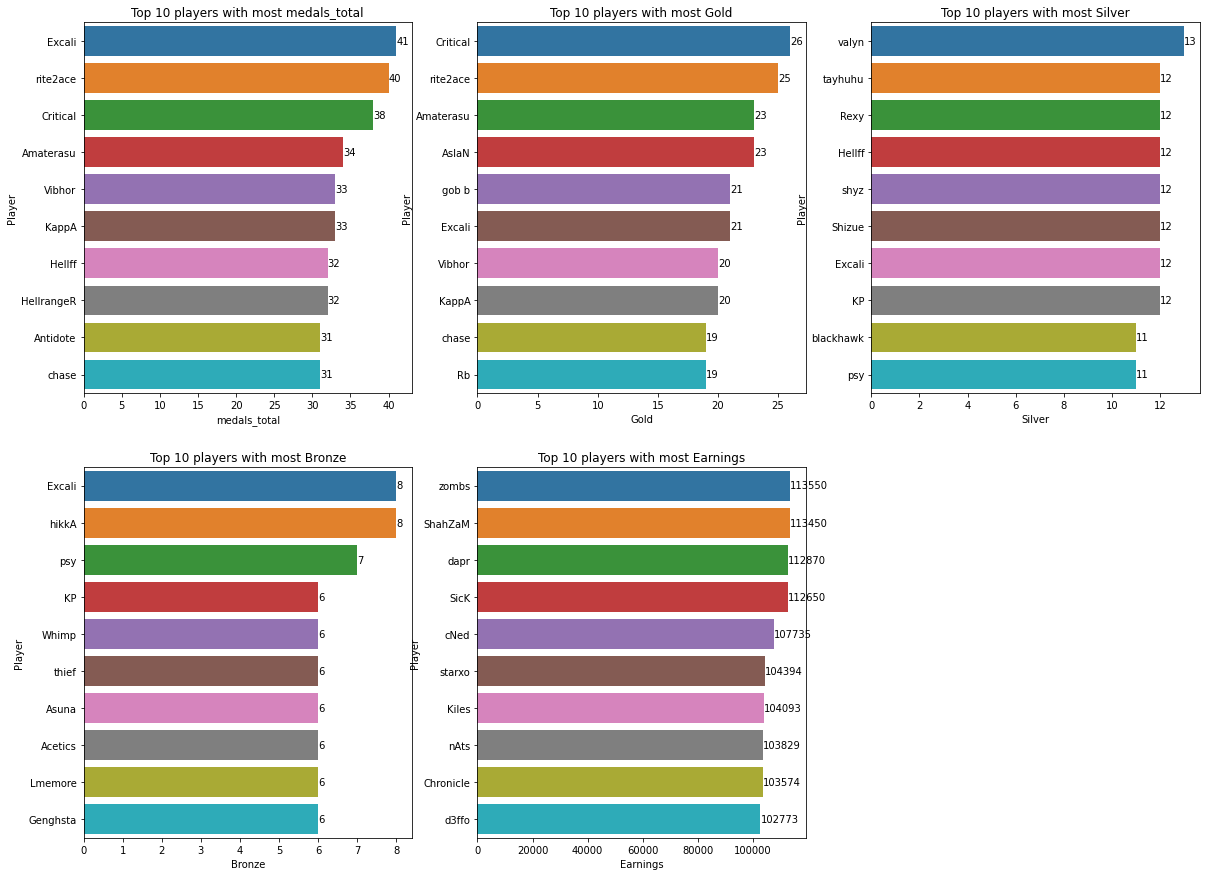

In [19]:
# Top 10 in different features of players data
plt.figure(figsize=(20,15))
for i,col in enumerate(col_viz):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=players.sort_values(by=col,ascending=False).head(10),x = col,y='Player')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 players with most {col}')
plt.show()

* Excali is the player with most total medals and bronze medals
* Critical is the player with most gold medals and Valyn with most silver medals
* Zombs is player with most easrnings

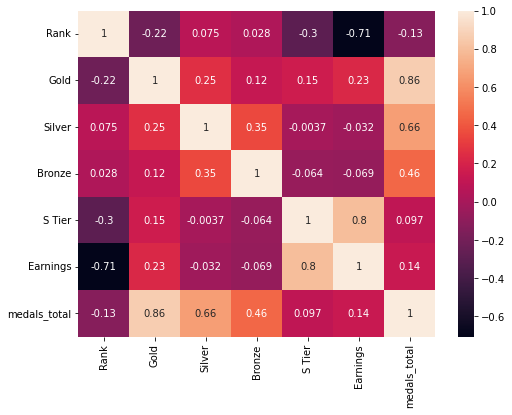

In [20]:
#Relation between medals and earnings
plt.figure(figsize=(8,6))
sns.heatmap(players.corr(),annot=True)
plt.show()

* Earnings and S Tier are strongly correlated
* Rank is negatively correlated with Earnings

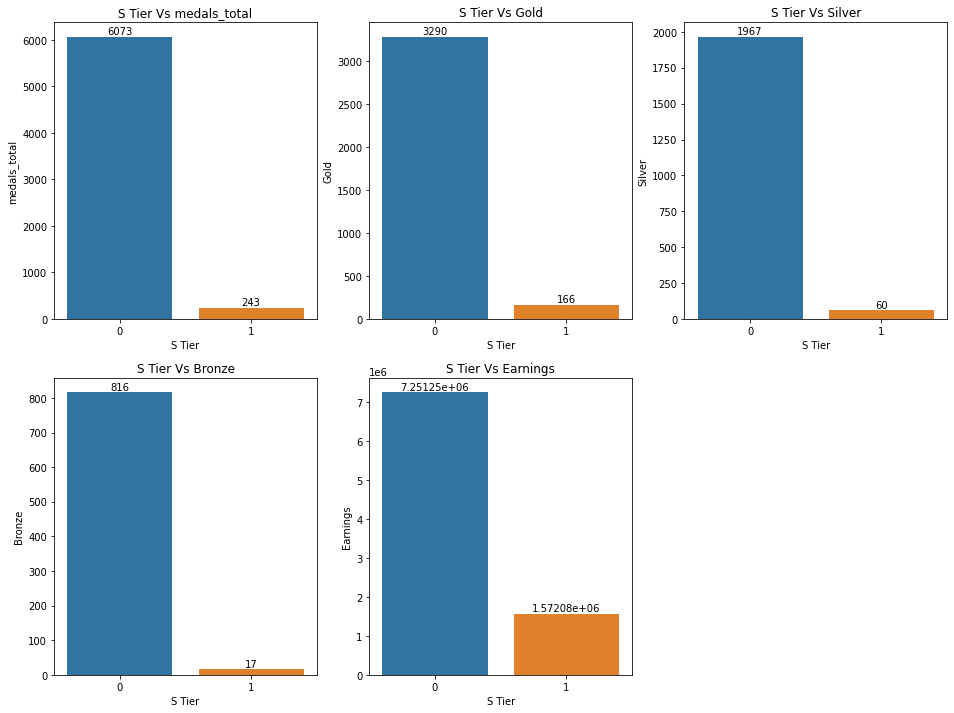

In [21]:
# Grouping based on S Tier
group_players_s = players.groupby('S Tier').sum().reset_index()

# players S Tier charts
plt.figure(figsize=(16,12))
for i,col in enumerate(col_viz):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=group_players_s,x='S Tier',y=col)
    ax.bar_label(ax.containers[0])
    plt.title(f'S Tier Vs {col}')
plt.show()

In [22]:
# Players with S Tier rating 1
players[players['S Tier']==1]

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings,medals_total
0,1,zombs,13,5,1,1,113550,19
1,2,ShahZaM,13,4,1,1,113450,18
2,3,dapr,14,3,1,1,112870,18
3,4,SicK,12,3,1,1,112650,16
4,5,cNed,12,4,2,1,107735,18
5,6,starxo,12,4,1,1,104394,17
6,7,Kiles,6,4,2,1,104093,12
7,8,nAts,14,6,0,1,103829,20
8,9,Chronicle,13,6,0,1,103574,19
9,10,d3ffo,12,4,2,1,102773,18


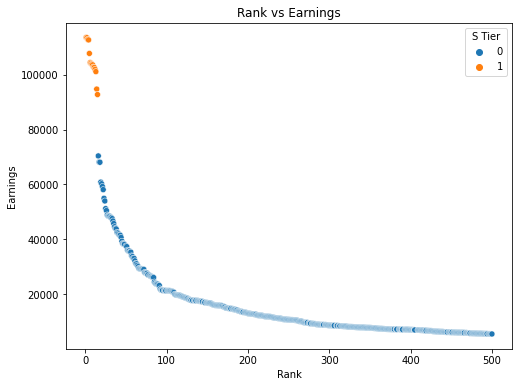

In [23]:
# Relationship between Rank and Earnings
plt.figure(figsize=(8,6))
sns.scatterplot(data=players,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()

### Visualizations of Teams data

In [24]:
# calculating total medals
teams['medals_total'] = teams['Gold'] + teams['Silver'] + teams['Bronze']

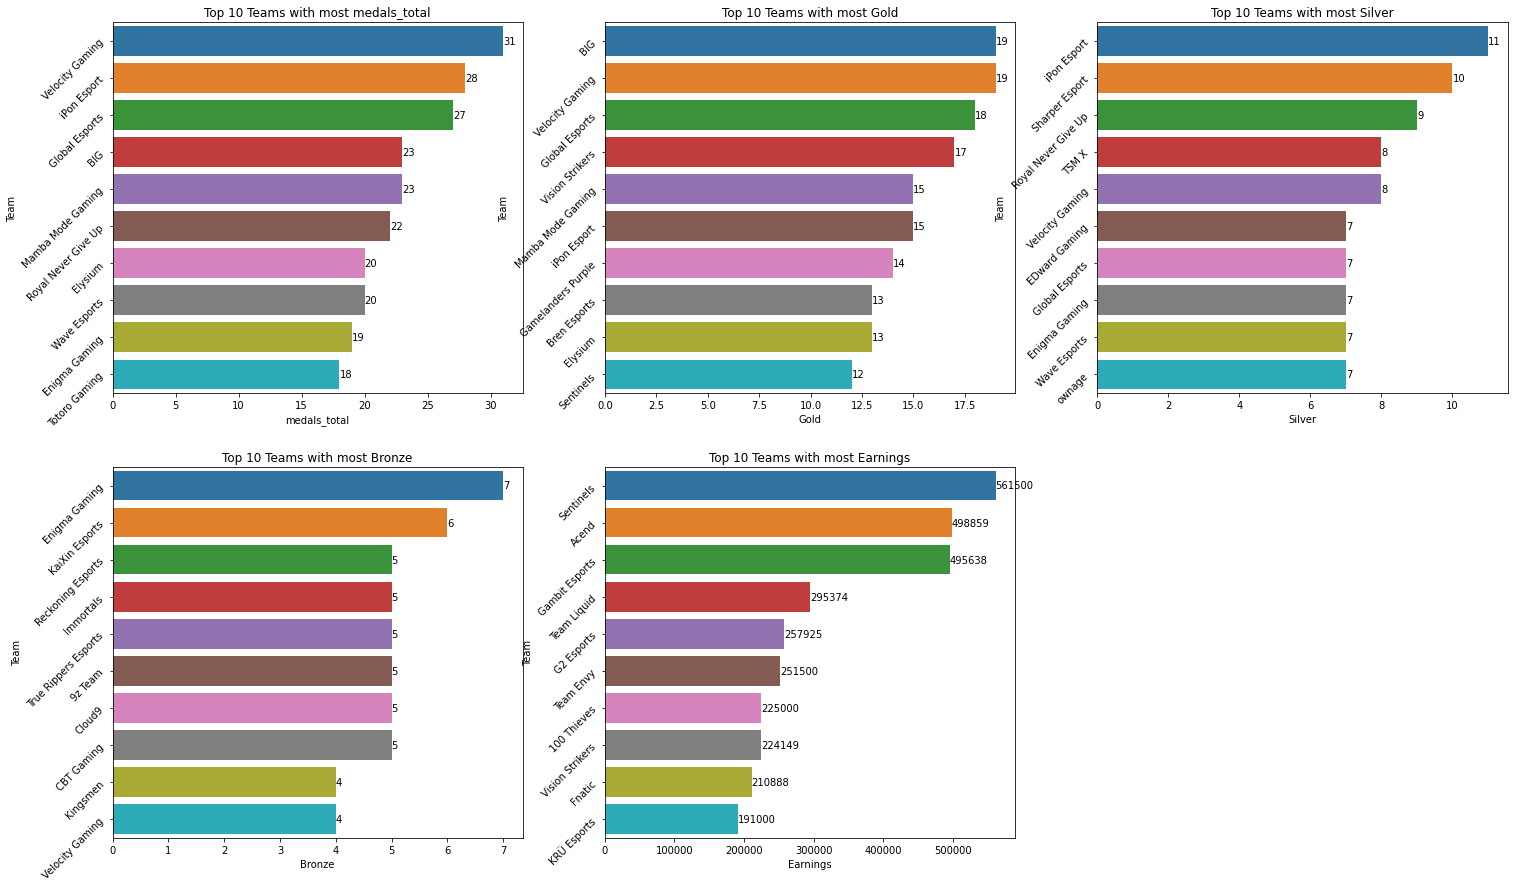

In [25]:
# Top 10 in different features of teams data
plt.figure(figsize=(25,15))
for i,col in enumerate(col_viz):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=teams.sort_values(by=col,ascending=False).head(10),x=col,y='Team')
    ax.bar_label(ax.containers[0])
    plt.yticks(rotation=45)
    plt.title(f'Top 10 Teams with most {col}')
plt.show()

* Velocity gaming team has earned the most medals
* BIG team has the most gold medals, whereas iPon sport team has most silver medals
* Enigma gaming team earned most of the bronze medals
* Sentinels is most earning team

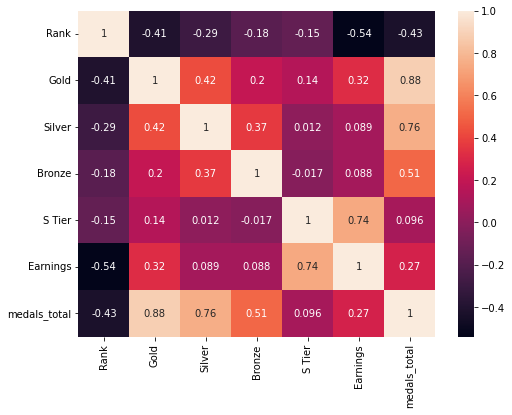

In [26]:
#Relation between medals and earnings
plt.figure(figsize=(8,6))
sns.heatmap(teams.corr(),annot=True)
plt.show()

* Earnings and S Tier are highly correlated
* Rank has negative correlation with earnings

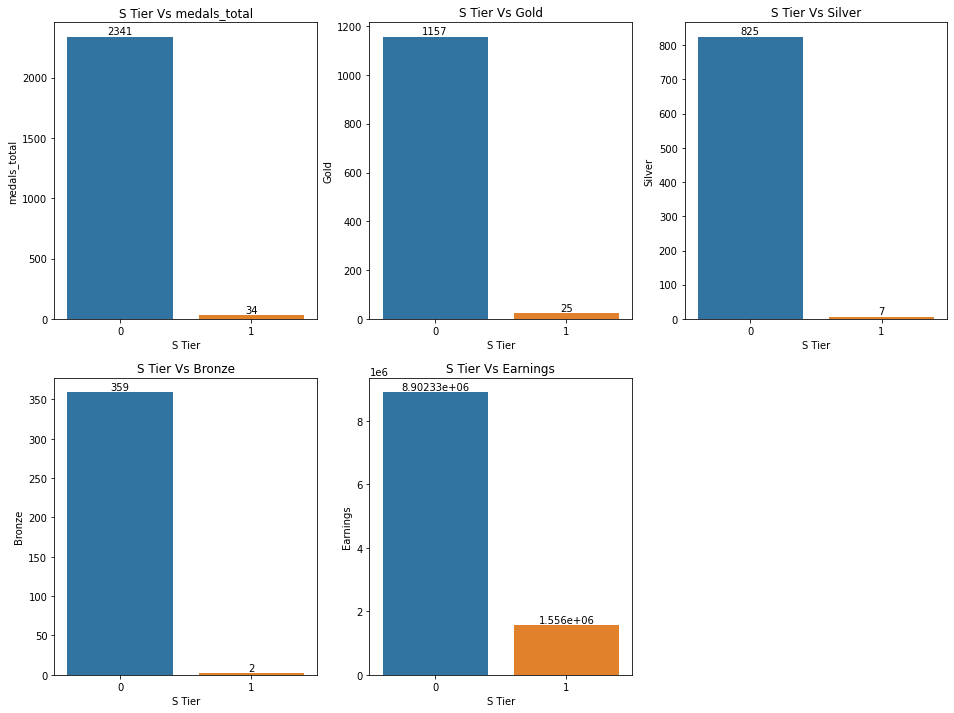

In [27]:
# Grouping data based on S tier
group_teams_s = teams.groupby('S Tier').sum().reset_index()

# Teams S Tier charts
plt.figure(figsize=(16,12))
for i,col in enumerate(col_viz):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(data=group_teams_s,x='S Tier',y=col)
    ax.bar_label(ax.containers[0])
    plt.title(f'S Tier Vs {col}')
plt.show()

In [28]:
# Teams with S Tier rating 1
teams[teams['S Tier']==1]

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings,medals_total
0,1,Sentinels,12,3,1,1,561500,16
1,2,Acend,5,1,1,1,498859,7
2,3,Gambit Esports,8,3,0,1,495638,11


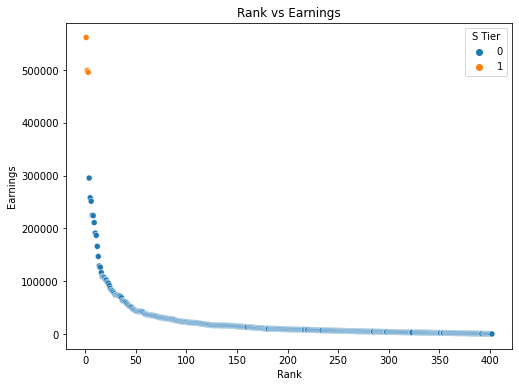

In [29]:
# Relationship between Rank and Earnings
plt.figure(figsize=(8,6))
sns.scatterplot(data=teams,x='Rank', y='Earnings', hue='S Tier')
plt.title('Rank vs Earnings')
plt.show()

## Thank You.